# Exploratory Twitter Data Analysis
# Naive Bayes and initial Random Forest Model - Machine Learning

In [41]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [42]:
# consumer_key = "consumer_key"
# consumer_secret = "consumer_secret"
# access_token_key = "access_token_key"
# access_token_secret = "access_token_secret"

In [43]:
# authenticate Tweepy
# authentication = tw.OAuthHandler(consumer_key, consumer_secret)
# authentication.set_access_token(access_token_key, access_token_secret)
# api = tw.API(authentication)

In [44]:
df = pd.read_csv("combined_data_gather_twitter_Oct_30.csv",encoding= 'unicode_escape')

In [45]:
df.shape

(1010508, 4)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010508 entries, 0 to 1010507
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1010508 non-null  object 
 1   Data       1010508 non-null  object 
 2   Polarity   1010508 non-null  float64
 3   Sentiment  1010508 non-null  object 
dtypes: float64(1), object(3)
memory usage: 30.8+ MB


In [47]:
df = pd.read_csv("tweetdata",encoding= 'unicode_escape')

In [48]:
df = df.drop(df[df['Data'] == ''].index)

In [49]:
def getTextAnalysis(a):
    if a > 0:
        return "1"
    else:
        return "0"

In [50]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [51]:
df[df['Score'] == '1'].shape

(4946, 5)

In [52]:
df[df['Score'] == '0'].shape

(5054, 5)

In [53]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df,test_size = 0.4)

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import string

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
train_pos = train[ train['Score'] == '1']
train_pos = train_pos['Data']
train_neg = train[ train['Score'] == '0']
train_neg = train_neg['Data']

Positive words


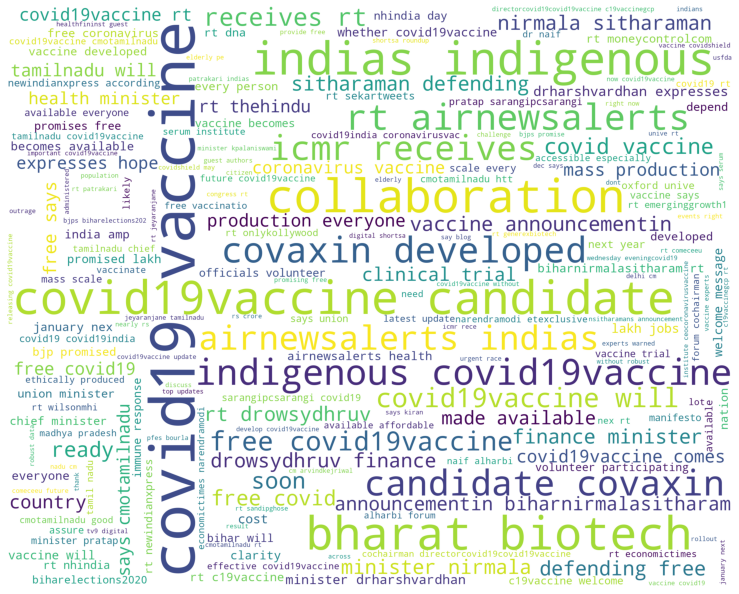

Negative words


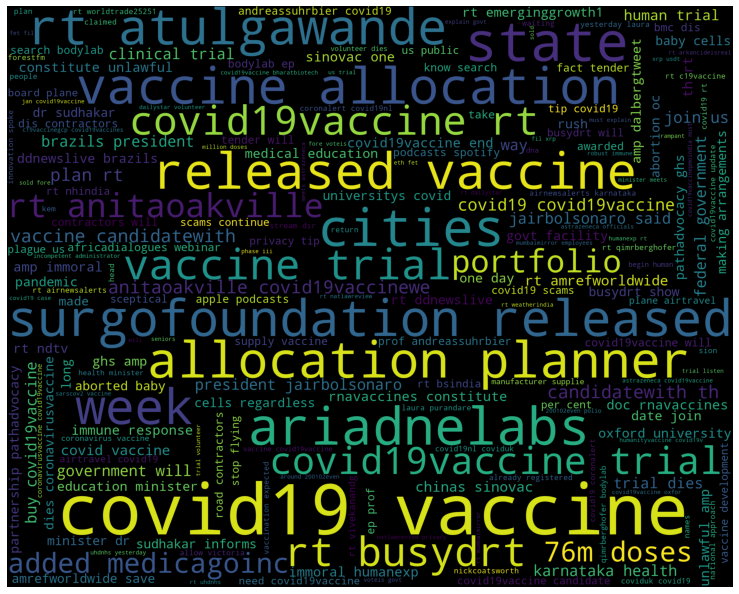

In [27]:
def wordclouds(data, color = 'black'):
    data = data.str.lower()
    all_data= data.str.split(' ')
    all_cleaned = []

    for sen in all_data:
        sen = [ele.strip(string.punctuation) for ele in sen]
        all_cleaned.append(sen)
        
    text_data = [" ".join(sen) for sen in all_cleaned]
    w_s = " ".join(text_data)
    cleaned = " ".join([w for w in w_s.split()
                            if 'http' not in w
                                and not w.startswith('@')
                                and not w.startswith('#')
                                and w != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordclouds(train_pos,'white')
print("Negative words")
wordclouds(train_neg)

In [55]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Data.split() if len(e) >= 3]
    words_final = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_final if not word in stopwords_set]
    tweets.append((words_final,row.Score))

test_pos = test[ test['Score'] == '1']
test_pos = test_pos['Data']
test_neg = test[ test['Score'] == '0']
test_neg = test_neg['Data']

In [56]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
v_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in v_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [57]:
v_features

dict_keys(['the', 'fdas', 'vaccines', 'and', 'related', 'biological', 'products', 'advisory', 'committee', 'its', 'role', 'advising', 'agency', 'covid', 'placebo', 'group', 'what', 'happens', 'after', 'covid19vaccine', 'authorized', 'bottlenecks', 'congested', 'hub', 'airports', 'will', 'likely', 'critical', 'point', 'distribution', 'uhdnhs', 'yesterday', 'laura', 'purandare', 'our', 'head', 'research', 'innovation', 'spoke', 'forestfm', 'about', 'trial', 'listen', 'her', 'young', 'volunteer', 'university', 'oxford', 'astrazeneca', 'has', 'died', 'brazil', 'deadly', 'cyprus', 'records', '188', 'new', 'covid19', 'cases', 'thursday', 'patients', 'reference', 'hospital', 'once', 'there', 'who', 'get', 'firstindiana', 'lays', 'out', 'plan', 'insight', 'into', 'status', 'clinical', 'trials', 'wont', 'tell', 'effectiveness', 'potential', 'joebiden', 'promises', 'free', 'for', 'everyone', 'elected', 'president', 'modernatx', 'says', 'preparing', 'launch', 'report', 'shows', 'strong', 'immune'

In [58]:
def wordcloud(data, color = 'black'):
    all_data= data
    all_cleaned = []

    for element in all_data:
        element = [elem.strip(string.punctuation) for elem in element]
        all_cleaned.append(element)
        
    element_data = [" ".join(element) for text in all_cleaned]
    elementwords = " ".join(element_data)
    cleaned_word = " ".join([e_word for e_word in elementwords.split()
                            if 'http' not in e_word
                                and not e_word.startswith('@')
                                and not e_word.startswith('#')
                                and e_word != 'RT'
                            ])

In [25]:
wordcloud(v_features)

# NaiveBayesClassifier

In [59]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [60]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == '0'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == '1'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 2011/1975 
[Positive]: 1989/1768 


In [61]:
positive = df[df['Score'] == '1']
print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

49.46 % of positive tweets


In [62]:
positive = df[df['Score'] == '0']
print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

50.54 % of positive tweets


<BarContainer object of 2 artists>

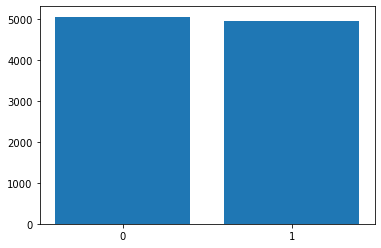

In [63]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values

plt.bar(labels, values)

In [64]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

form_sentence(df['Data'].iloc[5000])

'What does this short immunity mean for a vaccine COVID19vaccine'

In [65]:
from nltk.corpus import stopwords
def no_user_alpha(tweet):
    tweets = [elemen for elemen in tweet.split() if elemen != 'user']
    tokens = [tweet for tweet in tweets if re.match(r'[^\W\d]*$', tweet)]
    clean = ' '.join(tokens)
    cleaned = [w for w in clean.split() if w.lower() not in stopwords.words('english')]
    return cleaned
(no_user_alpha(form_sentence(df['Data'].iloc[5000])))


['short', 'immunity', 'mean', 'vaccine']

In [66]:
from nltk.stem.wordnet import WordNetLemmatizer
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
(normalization(df['Data']))

['cnsnews benshapiro Can COVID19Vaccine end the pandemic',
 'IntrepidWarrior realDonaldTrump Can COVID19Vaccine end the pandemic',
 'edyong209 HelenBranswell Can COVID19Vaccine end the pandemic',
 'AdamTexDavis Can COVID19Vaccine end the pandemic',
 'HegKong Can COVID19Vaccine end the pandemic',
 'DrTessaT HegKong Can COVID19Vaccine end the pandemic',
 'FarahKhanAli Can COVID19Vaccine end the pandemic',
 'putaYINGonit CMSGov Can COVID19Vaccine end the pandemic',
 'C19Vaccine kaimrcksa CEPIvaccines KSAMedResearch MRIGlobalNews KelloggOx zoomus Alaskar98 DeepTechVC',
 'Moderna Prepares to Launch COVID19 Vaccine CandidateBiopharmaceutical CoronaVirus CoronavirusTreatment',
 'RT iansindia Russian President VladimirPutin said on Thursday that Russia is ready to produce COVID19 vaccines at the sites of foreig',
 'RT SurgoFoundation Indepth story on the need for govts to plan ahead for distribution once a COVID19vaccine is available We cant rep',
 'RT ndtv BJP Manifesto For Madhya Pradesh Byp

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow',CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [68]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(df['Data'], df['Score'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)


In [69]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1007
           1       0.97      0.97      0.97       993

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[982  25]
 [ 33 960]]
0.971


# RandomForestClassifier Model 1

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
vectorized_features = vectorizer.fit_transform(df['Data']).toarray()

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorized_features, df['Score'], test_size=0.2, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [73]:
predictions = text_classifier.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1028    0]
 [   2  970]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1028
           1       1.00      1.00      1.00       972

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

0.999


# ReSampling RandomForestClassifier

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

target = df.Score
feature = df.Data

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
X = pd.concat([X_train, y_train], axis=1)

pos= X[X.Score=='1']
neg= X[X.Score=='0']

upsampled = resample(neg,
                          replace=True, 
                          n_samples=len(pos), 
                          random_state=27) 

up_sampled = pd.concat([neg, upsampled])
up_sampled.Data

9254    Moderna Prepares to Launch COVID19 Vaccine Can...
1561    Australia is introducing a digital health pass...
1670    Sanofi GlaxoSmithKline to Help WHOLed COVAX Cr...
6087    Cali government to rereview any Covid19Vaccine...
6669    Medicago signs agreements with the Government ...
                              ...                        
2051    RT ArtPedd BusyDrT Will you stop flying if you...
2179    RT C19Vaccine About usCOVID19COVID19Vaccine C1...
4690    TarekFatah guardian Can COVID19Vaccine end the...
1834    RT MumbaiMirror 8000 employees from KEM and Si...
1171    RT weatherindia Weekly COVID19Vaccine Update S...
Name: Data, Length: 8000, dtype: object

In [76]:
up_sampled

,Data,Score
9254,Moderna Prepares to Launch COVID19 Vaccine Can...,0
1561,Australia is introducing a digital health pass...,0
1670,Sanofi GlaxoSmithKline to Help WHOLed COVAX Cr...,0
6087,Cali government to rereview any Covid19Vaccine...,0
6669,Medicago signs agreements with the Government ...,0
...,...,...
2051,RT ArtPedd BusyDrT Will you stop flying if you...,0
2179,RT C19Vaccine About usCOVID19COVID19Vaccine C1...,0
4690,TarekFatah guardian Can COVID19Vaccine end the...,0
1834,RT MumbaiMirror 8000 employees from KEM and Si...,0


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
vectorizer_features = vectorizer.fit_transform(up_sampled['Data']).toarray()

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorizer_features, up_sampled['Score'], test_size=0.2, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [80]:
predictions = text_classifier.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1600]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

1.0
